In [1]:
import pickle
import pandas as pd
with open('run_statistics.pkl', 'rb') as f:
    data = pickle.load(f)
    df = pd.DataFrame(data)

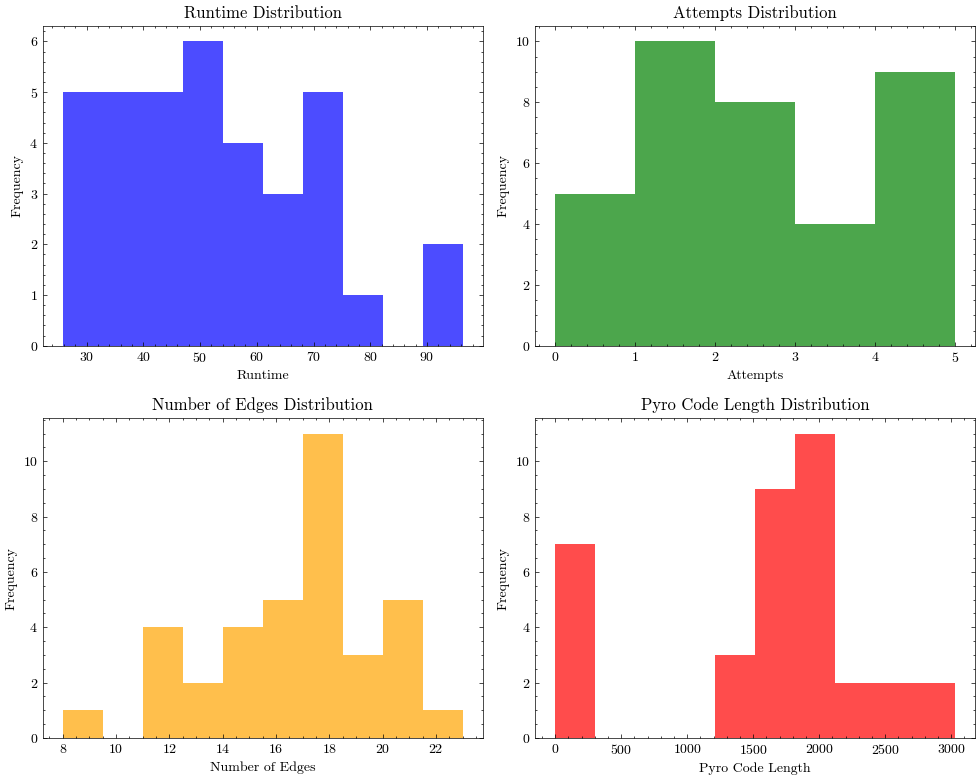

Counter({None: 28, 'exec() arg 1 must be a string, bytes or code object': 7, 'a Tensor with 3 elements cannot be converted to Scalar': 1})


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import collections
import scienceplots

def count_edges(edges):
    if edges == "None" or edges == None:
        return 0
    return len(edges) 

def code_length(code):
    if code == "None" or code == None:
        return 0
    return len(code)

df['num_edges'] = df['edges'].apply(count_edges)

df['pyro_code_length'] = df['pyro_code'].apply(code_length)

common_errors = collections.Counter(df['error_message'])

def plot_histograms(df):
    plt.style.use(['science', 'no-latex'])
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    axs[0, 0].hist(df['runtime'], bins=10, color='blue', alpha=0.7)
    axs[0, 0].set_title('Runtime Distribution')
    axs[0, 0].set_xlabel('Runtime')
    axs[0, 0].set_ylabel('Frequency')

    axs[0, 1].hist(df['attempts'], bins=5, color='green', alpha=0.7)
    axs[0, 1].set_title('Attempts Distribution')
    axs[0, 1].set_xlabel('Attempts')
    axs[0, 1].set_ylabel('Frequency')

    axs[1, 0].hist(df['num_edges'], bins=10, color='orange', alpha=0.7)
    axs[1, 0].set_title('Number of Edges Distribution')
    axs[1, 0].set_xlabel('Number of Edges')
    axs[1, 0].set_ylabel('Frequency')

    axs[1, 1].hist(df[df['pyro_code'] != 'None']['pyro_code_length'], bins=10, color='red', alpha=0.7)
    axs[1, 1].set_title('Pyro Code Length Distribution')
    axs[1, 1].set_xlabel('Pyro Code Length')
    axs[1, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_histograms(df)

print(common_errors)

In [15]:
# overall success rate
success_rate = len(df[df['success'] == True]) / 50
print(success_rate)

0.56
